# 2019 Regression Deep Dive

A regression on only 2019 Data, We wanted to take a deeper look at 2019 and see what we could find.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
freedom_data = pd.read_excel("data/index2019_data_expanded.xls")

In [3]:
freedom_data

CountryID Country Name      WEBNAME                        Region  \
0            1  Afghanistan  Afghanistan                  Asia-Pacific   
1            2      Albania      Albania                        Europe   
2            3      Algeria      Algeria  Middle East and North Africa   
3            4       Angola       Angola            Sub-Saharan Africa   
4            5    Argentina    Argentina                      Americas   
..         ...          ...          ...                           ...   
181        179    Venezuela    Venezuela                      Americas   
182        180      Vietnam      Vietnam                  Asia-Pacific   
183        181        Yemen        Yemen  Middle East and North Africa   
184        182       Zambia       Zambia            Sub-Saharan Africa   
185        183     Zimbabwe     Zimbabwe            Sub-Saharan Africa   

     World Rank  Region Rank  2019 Score  Property Rights  \
0         152.0         39.0        51.5             19.6   
1          52.0         27.0        66.5             54.8   
2         171.0         14.0        46.2             31.6   
3         156.0         33.0        50.6             35.9   
4         148.0         26.0        52.2             47.8   
..          ...          ...         ...              ...   
181       179.0         32.0        25.9              7.6   
182       128.0         30.0        55.3             49.8   
183         NaN          NaN         NaN             19.6   
184       138.0         27.0        53.6             45.0   
185       175.0         45.0        40.4             29.7   

     Judical Effectiveness  Government Integrity  ...      Country  \
0                     29.6                  25.2  ...  Afghanistan   
1                     30.6                  40.4  ...      Albania   
2                     36.2                  28.9  ...      Algeria   
3                     26.6                  20.5  ...       Angola   
4                     44.5                  33.5  ...    Argentina   
..                     ...                   ...  ...          ...   
181                   13.1                   7.9  ...    Venezuela   
182                   40.3                  34.0  ...      Vietnam   
183                   22.2                  20.3  ...        Yemen   
184                   35.6                  32.3  ...       Zambia   
185                   24.8                  15.8  ...     Zimbabwe   

     Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                     35.5                 69.6                2.505   
1                      2.9                   36                3.900   
2                     41.5                632.9                2.000   
3                     28.2                190.3                0.700   
4                     44.1                920.2                2.900   
..                     ...                  ...                  ...   
181                   31.4                380.7              -14.000   
182                   93.6                647.4                6.800   
183                     30                 38.6              -13.800   
184                   17.2                 68.9                3.600   
185                   14.9                   34                3.000   

     5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                           2.9               1957.58               8.8   
1                           2.5               12506.6              13.9   
2                           3.1               15237.2                10   
3                           2.9               6752.58               8.2   
4                           0.7               20875.8               8.7   
..                          ...                   ...               ...   
181                        -7.8               12113.5               7.7   
182                         6.2               6913.13               2.1   
18

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
freedom_data = freedom_data.dropna()


In [6]:
freedom_data[80:100]

CountryID     Country Name         WEBNAME                        Region  \
83          82            Japan           Japan                  Asia-Pacific   
84          83           Jordan          Jordan  Middle East and North Africa   
85          84       Kazakhstan      Kazakhstan                  Asia-Pacific   
86          85            Kenya           Kenya            Sub-Saharan Africa   
89          88     Korea, South      SouthKorea                  Asia-Pacific   
91          89           Kuwait          Kuwait  Middle East and North Africa   
92          90  Kyrgyz Republic  KyrgyzRepublic                  Asia-Pacific   
93          91             Laos            Laos                  Asia-Pacific   
94          92           Latvia          Latvia                        Europe   
95          93          Lebanon         Lebanon  Middle East and North Africa   
96          94          Lesotho         Lesotho            Sub-Saharan Africa   
97          95          Liberia         Liberia            Sub-Saharan Africa   
100         98        Lithuania       Lithuania                        Europe   
101         99       Luxembourg      Luxembourg                        Europe   
102        100            Macau           Macau                  Asia-Pacific   
103        101        Macedonia       Macedonia                        Europe   
104        102       Madagascar      Madagascar            Sub-Saharan Africa   
105        103           Malawi          Malawi            Sub-Saharan Africa   
106        104         Malaysia        Malaysia                  Asia-Pacific   
107        105         Maldives        Maldives                  Asia-Pacific   

     World Rank  Region Rank  2019 Score  Property Rights  \
83         30.0          8.0        72.1             84.1   
84         53.0          4.0        66.5             58.4   
85         59.0         12.0        65.4             59.3   
86        130.0         22.0        55.1             53.8   
89         29.0          7.0        72.3             79.3   
91         90.0          8.0        60.8             52.9   
92         79.0         17.0        62.3             49.9   
93        110.0         24.0        57.4             38.8   
94         35.0         18.0        70.4             67.3   
95        154.0         12.0        51.1             39.5   
96        142.0         28.0        53.1             41.5   
97        160.0         37.0        49.7             26.7   
100        21.0         12.0        74.2             73.6   
101        17.0          9.0        75.9             83.0   
102        34.0          9.0        71.0             60.0   
103        33.0         17.0        71.1             65.1   
104       114.0         15.0        56.6             33.2   
105       153.0         32.0        51.4             35.8   
106        22.0          6.0        74.0             84.1   
107       141.0         37.0        53.2             43.9   

     Judical Effectiveness  Government Integrity  ...          Country  \
83                    68.5                  78.0  ...            Japan   
84                    52.6                  50.3  ...           Jordan   
85                    56.1                  40.3  ...       Kazakhstan   
86                    46.9                  32.1  ...            Kenya   
89                    57.5                  50.5  ...     Korea, South   
91                    43.3                  35.3  ...           Kuwait   
92                    27.9                  27.2  ...  Kyrgyz Republic   
93                    42.5                  33.5  ...       Lao P.D.R.   
94                    48.4                  35.5  ...           Latvia   
95                    26.6                  18.2  ...          Lebanon   
96                    45.7                  30.9  ...          Lesotho   
97                    39.0                  24.2  ...          Liberia   
100                   61.2                  47.8  ...      

In [7]:
freedom_data.columns[29]

'GDP per Capita (PPP)'

In [8]:
freedom_data = freedom_data.drop(freedom_data.columns[[1,2,3,24,25,26]], axis=1)

In [9]:
X = freedom_data.drop(freedom_data.columns[[23]], axis=1)
#y = freedom_data.iloc[29]
y = freedom_data['GDP per Capita (PPP)'].tolist()

In [26]:
X

CountryID  World Rank  Region Rank  2019 Score  Property Rights  \
0            1       152.0         39.0        51.5             19.6   
1            2        52.0         27.0        66.5             54.8   
2            3       171.0         14.0        46.2             31.6   
3            4       156.0         33.0        50.6             35.9   
4            5       148.0         26.0        52.2             47.8   
..         ...         ...          ...         ...              ...   
180        178       116.0         26.0        56.4             65.9   
181        179       179.0         32.0        25.9              7.6   
182        180       128.0         30.0        55.3             49.8   
184        182       138.0         27.0        53.6             45.0   
185        183       175.0         45.0        40.4             29.7   

     Judical Effectiveness  Government Integrity  Tax Burden  Gov't Spending  \
0                     29.6                  25.2        91.7            80.3   
1                     30.6                  40.4        86.3            73.9   
2                     36.2                  28.9        76.4            48.7   
3                     26.6                  20.5        83.9            80.7   
4                     44.5                  33.5        69.3            49.5   
..                     ...                   ...         ...             ...   
180                   36.4                  51.9        97.3            54.1   
181                   13.1                   7.9        74.7            58.1   
182                   40.3                  34.0        79.7            74.1   
184                   35.6                  32.3        72.3            80.1   
185                   24.8                  15.8        62.3            74.5   

     Fiscal Health  ...  Income Tax Rate (%)  Corporate Tax Rate (%)  \
0             99.3  ...                 20.0                    20.0   
1             80.6  ...                 23.0                    15.0   
2             18.7  ...                 35.0                    23.0   
3             58.2  ...                 17.0                    30.0   
4             33.0  ...                 35.0                    30.0   
..             ...  ...                  ...                     ...   
180           15.3  ...                  0.0                     0.0   
181           17.6  ...                 34.0                    34.0   
182           40.7  ...                 35.0                    22.0   
184           12.3  ...                 35.0                    35.0   
185           23.7  ...                 51.5                    25.0   

     Tax Burden % of GDP  Gov't Expenditure % of GDP   GDP Growth Rate (%)  \
0                   5.04                         25.6                2.505   
1                  24.90                         29.5                3.900   
2                  24.50                         41.4                2.000   
3                  20.58                         25.3                0.700   
4                  30.80                         41.0                2.900   
..                   ...                          ...                  ...   
180                16.30                         39.1                4.200   
181                14.90                         37.4              -14.000   
182                17.95                         29.4                6.800   
184                17.90                         25.8                3.600   
185                22.30                         29.2                3.000   

     5 Year GDP Growth Rate (%)  Unemployment (%)  Inflation (%)  \
0                           2.9               8.8            5.0   
1                           2.5              13.9            2.0   
2                           3.1                10            5.6   
3                           2.9               8.2           31.7   
4                           0.7      

In [10]:
model = LinearRegression(normalize=True)
model.fit(X,y)
score = model.score(X,y)
print(f'R^2 Score: {score}')

R^2 Score: 0.6970790983202277


## Adjusted R2

Because of the large number of variables, we needed to run an adjusted R-squared to make sure that our variables are actually explaining the model.

In [11]:
def r2_adj(X, y, norm=True, y_int=True):
    adj_model = LinearRegression(normalize=norm, fit_intercept=y_int)
    adj_model.fit(X, y)
    r_sq = adj_model.score(X, y)
    n, p = X.shape
    adj_r_sq = r_sq - (1 - r_sq) * p / (n - p - 1)
    return r_sq, adj_r_sq

In [12]:
r2_adj(X,y)

(0.6970790983202277, 0.6406731373177874)

### R2 results
It appears that our variables are fairly good. If we had variables that didn't explain the model, adjusted R-squared would have been much lower than the R-squared value.

## Regression vs Residuals

Shows the actual y values vs predicted y values. 

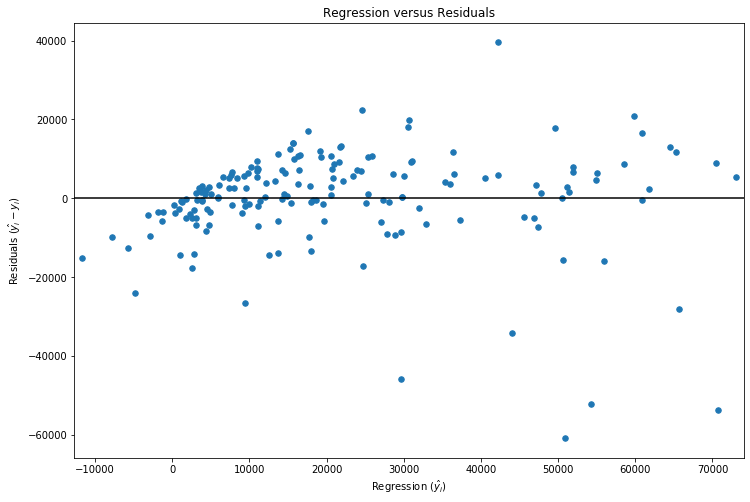

In [13]:
y_hat = model.predict(X)
res = y_hat - y


xlim = [y_hat.min()-1000, y_hat.max()+1000]
plt.figure(figsize=(12,8))
plt.scatter(y_hat, res, s=30)
plt.xlabel('Regression ($\hat{y_i}$)')
plt.ylabel('Residuals ($\hat{y_i} - y_i$)')
plt.title('Regression versus Residuals')
plt.hlines(0, xlim[0], xlim[1])
plt.xlim(xlim)
plt.show()

#### The graph shows that as y values increase, the variance and model become less certain

## Regression Vs Actual Y


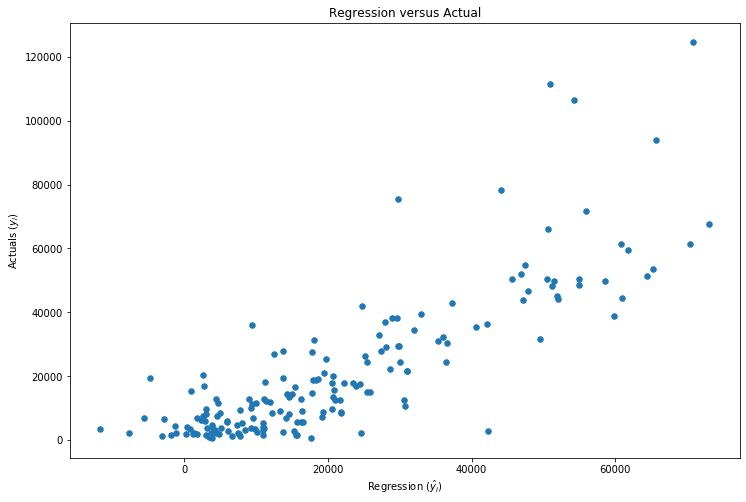

In [14]:
plt.figure(figsize=(12,8))
plt.scatter(y_hat, y, s=30)
plt.xlabel('Regression ($\hat{y_i}$)')
plt.ylabel('Actuals ($y_i$)')
plt.title('Regression versus Actual')
plt.show()

#### This regression looks to be exponential distributed. As such we must take the log of y to come up with a linear relationship

In [15]:
y_log = np.log(y)
lm_log = LinearRegression(normalize=True)
lm_log.fit(X,y_log)
r2_adj(X,y_log)

(0.7360755403032176, 0.6869309857389893)

In [16]:
y_hat_log = lm_log.predict(X)
res2 = y_hat_log - y_log
# Standardize residuals
res2_z = (res2 - res2.mean()) /  res2.std()

q75, q25 = np.percentile(res2, [75 ,25])
iqr = q75 - q25
out_right = res2[res2 >= (1.5 * iqr + q75)]
out_left = res2[res2 <= q25 - 1.5 * iqr]


In [27]:
out_right= pd.Series([out_right])
out_left= pd.Series([out_left])
array = pd.concat([out_left,out_right], ignore_index=True)
y_series = pd.Series(y_log)
array

0    0    [-1.5707968164420194, -1.7467400500812609...
1    0    [1.4250639470072874, 1.8971684161137699]
...
dtype: object

In [29]:
outliers

0             [1.4250639470072874, 1.8971684161137699]
0    [-1.5707968164420194, -1.7467400500812609, -1....
dtype: object

In [30]:
outliers = pd.concat([out_left, out_right])

X2 = X.drop(outliers.index, axis=0)
y2 = y_series.drop(outliers.index, axis=0)
model.fit(X2,y2)
r2_adj(X2, y2)


(0.7329569930975831, 0.68288642930338)

In [31]:
x_agg = freedom_data['2019 Score'].drop(outliers.index, axis=0).values.reshape(-1,1)
plot = LinearRegression(normalize=True, fit_intercept=True)

In [32]:
plot.fit(x_agg,y2)
y_hat_agg = plot.predict(x_agg)
x_hat_agg = np.linspace(25,100,100).reshape(-1,1)
y_hat_agg_reg = plot.predict(x_hat_agg)
res_ = y_hat_agg - y2


## Linear Regression IEF Score Vs. GDP per Capita PPP

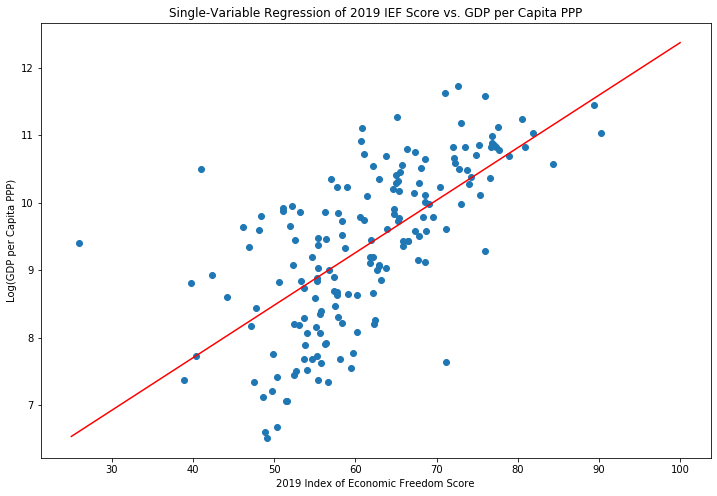

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(x_agg,y2)
plt.plot(x_hat_agg, y_hat_agg_reg, c='r')
plt.xlabel("2019 Index of Economic Freedom Score")
plt.ylabel("Log(GDP per Capita PPP)")
plt.title("Single-Variable Regression of 2019 IEF Score vs. GDP per Capita PPP")
plt.show()